In [116]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
train_path = (r'/kaggle/input/playground-series-s4e1/train.csv')
test_path = (r'/kaggle/input/playground-series-s4e1/test.csv')
df = pd.read_csv(train_path)
df_t=pd.read_csv(test_path)

In [119]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [121]:
df['Geography'].dtype

dtype('O')

In [122]:
#Bifercate columns into - numerical and categorical
columns = df.columns
cat_cols=[]
num_cols=[]
for col in columns:
    if(df[col].dtype=='O'):
        cat_cols.append(col)
    else :
        num_cols.append(col)
print('Categorical Cols: ',cat_cols,'Length: ',len(cat_cols))
print('\nNumerical Cols: ',num_cols,'\nLength: ',len(num_cols))

Categorical Cols:  ['Surname', 'Geography', 'Gender'] Length:  3

Numerical Cols:  ['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'] 
Length:  11


/tmp/ipykernel_42/46759888.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  fig=plt.style.use('seaborn')


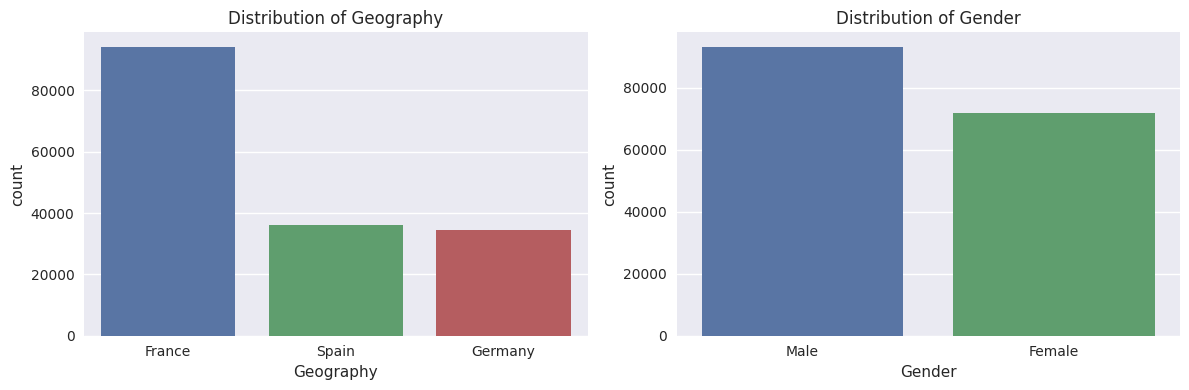

In [123]:
#Find out the distribution on categorical columns
#Remove surname from cat_cols
cat_cols=['Geography', 'Gender']
fig,axes = plt.subplots(1,2,figsize=(12,4))
fig=plt.style.use('seaborn')
for i, col in enumerate(cat_cols):
    sns.countplot(x=col,data=df,ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')   
plt.tight_layout()    

In [124]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})
num_cols.append('Gender')

In [125]:
df['Geography'] = df['Geography'].replace({'Germany':0,'Spain':1,'France':2})
num_cols.append('Geography')

In [126]:
print(num_cols)

['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender', 'Geography']


<Axes: >

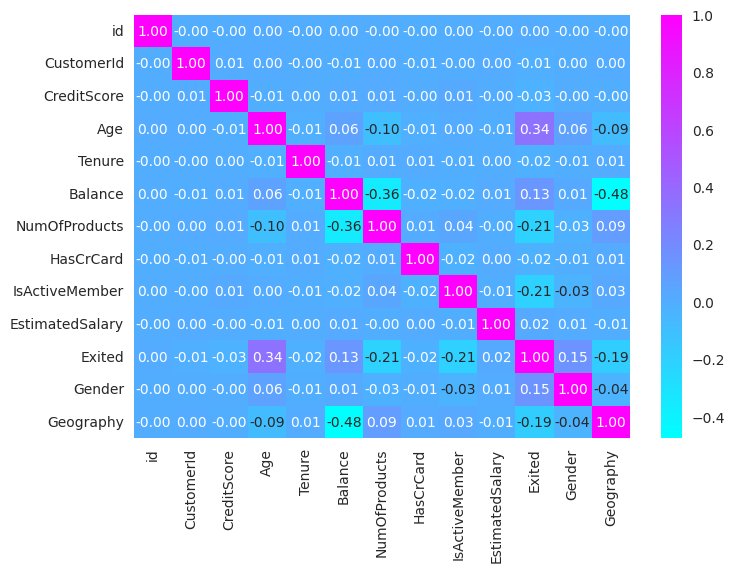

In [127]:
#Correlation of numerical variables
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, cmap='cool',  annot=True, fmt=".2f",  linecolor="white", xticklabels="auto", yticklabels="auto", ax=None)

<b>Correlations identified : </b>
- Age and Balance
- NumOfProducts and isActiveMember
- NumOfProducts and Geography
- Balance and Exited
- Age and Exited
- Gender Exited

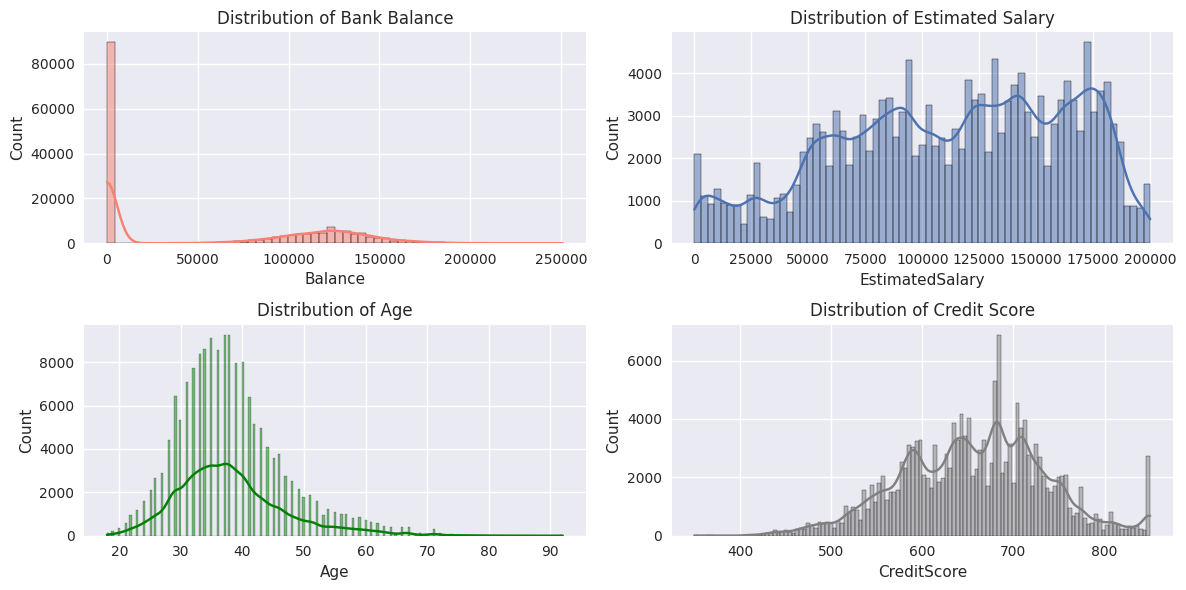

In [128]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.histplot(df['Balance'], kde=True,color='salmon', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bank Balance')

sns.histplot(df['EstimatedSalary'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Estimated Salary')

sns.histplot(df['Age'], kde=True, color='green',ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Age')

sns.histplot(df['CreditScore'], kde=True,color='gray', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Credit Score')

plt.tight_layout()
plt.show()

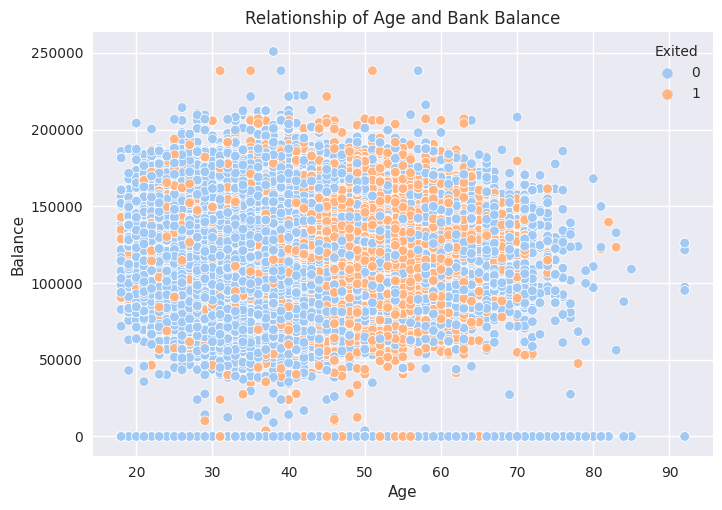

In [141]:
sns.scatterplot(x='Age',y='Balance',hue='Exited',palette='pastel', legend='full',data=df)
plt.title('Relationship of Age and Bank Balance')
plt.show()

In [138]:
paiplotdf=df[['Age','Balance','Gender','Exited']]

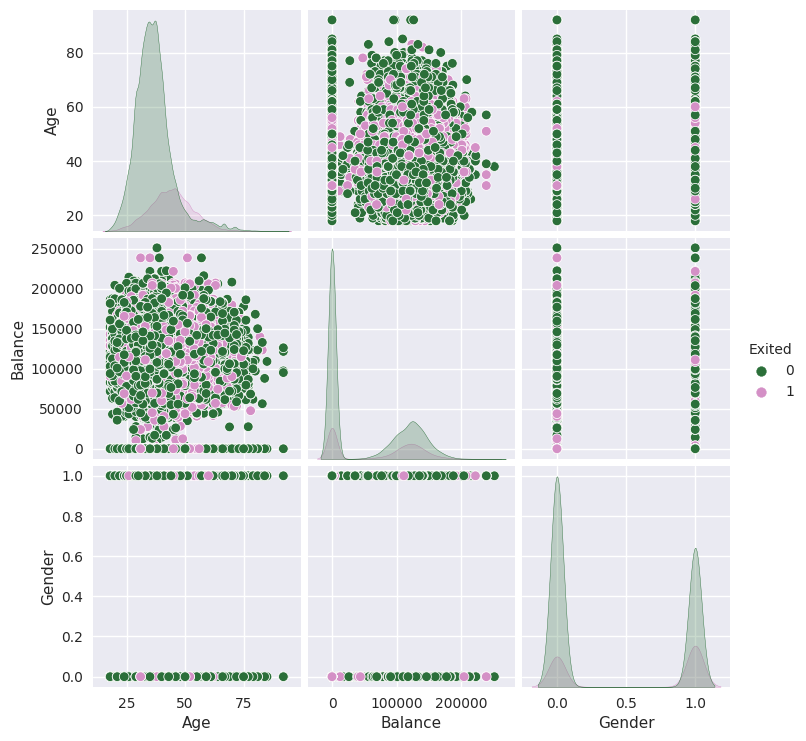

In [140]:
sns.pairplot(paiplotdf,hue='Exited', palette='cubehelix')
plt.show()
